# ===========================House_Price_Prediction================================

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Data Cleaning & Processing

In [2]:
housing = pd.read_csv('C:/Users/Rahul/Desktop/PROJECT 1/datasets/real_state.csv')

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
H1 = housing.drop(['No','X5 latitude','X6 longitude'],axis= 'columns')

In [6]:
H1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [7]:
H1['X1 transaction date'].values

array([2012.917, 2012.917, 2013.583, 2013.5  , 2012.833, 2012.667,
       2012.667, 2013.417, 2013.5  , 2013.417, 2013.083, 2013.333,
       2012.917, 2012.667, 2013.5  , 2013.583, 2013.25 , 2012.75 ,
       2013.417, 2012.667, 2013.417, 2013.417, 2012.917, 2013.083,
       2013.   , 2013.083, 2012.667, 2013.25 , 2013.5  , 2013.083,
       2013.5  , 2012.75 , 2012.75 , 2013.25 , 2012.75 , 2013.5  ,
       2012.917, 2013.167, 2012.667, 2013.167, 2013.   , 2013.5  ,
       2013.417, 2012.75 , 2013.583, 2013.083, 2013.417, 2013.583,
       2013.417, 2012.667, 2013.417, 2013.083, 2013.583, 2013.083,
       2013.083, 2012.833, 2013.417, 2012.917, 2013.5  , 2013.083,
       2013.417, 2013.5  , 2012.917, 2013.583, 2013.333, 2013.417,
       2013.   , 2013.5  , 2013.417, 2012.833, 2013.583, 2013.083,
       2013.583, 2013.167, 2012.917, 2013.5  , 2013.583, 2012.833,
       2012.917, 2013.   , 2013.5  , 2013.   , 2013.083, 2012.917,
       2013.083, 2012.75 , 2012.833, 2013.583, 2012.917, 2013.

In [8]:
H1['decimal_part'] = H1['X1 transaction date'] - H1['X1 transaction date'].astype(int)

H1['month of transaction'] = ((H1['decimal_part'] * 12).astype(int) + 1)

H1.drop(columns=['decimal_part'], inplace=True) 

In [9]:
H1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,month of transaction
0,2012.917,32.0,84.87882,10,37.9,12
1,2012.917,19.5,306.59470,9,42.2,12
2,2013.583,13.3,561.98450,5,47.3,7
3,2013.500,13.3,561.98450,5,54.8,7
4,2012.833,5.0,390.56840,5,43.1,10


In [10]:
H1['year of transaction'] = H1['X1 transaction date'].astype(int)

In [11]:
H1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,month of transaction,year of transaction
0,2012.917,32.0,84.87882,10,37.9,12,2012
1,2012.917,19.5,306.59470,9,42.2,12,2012
2,2013.583,13.3,561.98450,5,47.3,7,2013
3,2013.500,13.3,561.98450,5,54.8,7,2013
4,2012.833,5.0,390.56840,5,43.1,10,2012


In [12]:
H2 = H1.drop(['X1 transaction date'],axis = 'columns')
H2.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,month of transaction,year of transaction
0,32.0,84.87882,10,37.9,12,2012
1,19.5,306.59470,9,42.2,12,2012
2,13.3,561.98450,5,47.3,7,2013
3,13.3,561.98450,5,54.8,7,2013
4,5.0,390.56840,5,43.1,10,2012


In [13]:
H2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
 4   month of transaction                    414 non-null    int64  
 5   year of transaction                     414 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 19.5 KB


# Dataspit

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = H2.drop(['Y house price of unit area'],axis = 'columns')
y = H2['Y house price of unit area']

In [16]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [17]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,month of transaction,year of transaction
0,32.0,84.87882,10,12,2012
1,19.5,306.59470,9,12,2012
2,13.3,561.98450,5,7,2013
3,13.3,561.98450,5,7,2013
4,5.0,390.56840,5,10,2012
...,...,...,...,...,...
409,13.7,4082.01500,0,1,2013
410,5.6,90.45606,9,9,2012
411,18.8,390.96960,7,4,2013
412,8.1,104.81010,5,1,2013


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((331, 5), (83, 5), (331,), (83,))

# Training model

# 1. Linear_Regression

In [20]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train,y_train)

In [21]:
reg.score(X_test,y_test)

0.6544729749332447

In [22]:
reg.score(X_train,y_train)

0.5274568284458852

# 2.Lasso

In [23]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50 , max_iter= 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)

,alpha,50
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.1
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [24]:
lasso_reg.score(X_test,y_test)

0.5394057402544914

In [25]:
lasso_reg.score(X_train,y_train)

0.4316519495974962

# 3.Ridge

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50 , max_iter= 100,tol = 0.1)

In [27]:
ridge_reg.fit(X_train,y_train)

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,100
,tol,0.1
,solver,'auto'
,positive,False
,random_state,None


In [28]:
ridge_reg.score(X_test,y_test)

0.6580802296509675

In [29]:
ridge_reg.score(X_train,y_train)

0.5217012610651051

# 4.Decission_Tree_Regressor


In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)

In [31]:
model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
model.score(X_test,y_test)

0.7560098567870257

In [33]:
model.score(X_train,y_train)

0.8219562636452977

# 5.Random_Forest_Regressor


In [34]:
from sklearn.ensemble import RandomForestRegressor


In [35]:
model1 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model1.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
model1.score(X_test,y_test)

0.8003016858680531

In [37]:
model1.score(X_train,y_train)

0.9517378980919203

In [38]:
model1.predict(X_test)

array([49.907     , 37.793     , 47.99233333, 33.885     , 25.011     ,
       36.959     , 46.01066667, 50.36238095, 15.703     , 59.7371    ,
       23.803     , 31.14783333, 28.7675    , 15.883     , 39.47133333,
       24.866     , 39.65733333, 52.75173333, 25.92      , 34.089     ,
       16.809     , 26.434     , 49.248     , 49.04316667, 16.76788889,
       34.606     , 15.329     , 53.93680714, 53.186     , 34.03866667,
       18.191     , 26.1935    , 34.342     , 26.51      , 45.82731429,
       37.10633333, 54.618     , 16.292     , 37.096     , 57.733     ,
       43.521     , 40.489     , 45.885     , 38.98725   , 41.25426667,
       49.858     , 36.598     , 24.434     , 49.65433333, 46.756     ,
       49.4375    , 53.841     , 39.93      , 31.729     , 38.146     ,
       16.787     , 41.98283333, 26.998     , 24.393     , 50.46704762,
       24.282     , 23.24      , 16.787     , 15.675     , 17.81      ,
       27.461     , 26.046     , 37.795     , 34.068     , 27.14

# Evaluation

# Through MSE,MSE,R2_score

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
y_pred_reg = reg.predict(X_test)
y_pred_lasso_reg = lasso_reg.predict(X_test)
y_pred_Randomforest = model1.predict(X_test)
y_pred_DecisionTree = model.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

In [44]:
y_pred = [y_pred_reg,y_pred_lasso_reg,y_pred_Randomforest,y_pred_DecisionTree,y_pred_ridge]
mae = []
rmse = []
r2 = []
for i in y_pred:
    mae.append(mean_absolute_error(y_test, i))
    rmse.append(np.sqrt(mean_squared_error(y_test, i)))
    r2.append(r2_score(y_test, i))

In [47]:
evaluation = pd.DataFrame({
    "model" : ["y_pred_reg","y_pred_lasso_reg","y_pred_Randomforest","y_pred_DecisionTree","y_pred_ridge"],
    "MAE" : mae,
    "RMSE" : rmse,
    "R2_score" : r2,
})
evaluation.head()

,model,MAE,RMSE,R2_score
0,y_pred_reg,5.600478,7.613509,0.654473
1,y_pred_lasso_reg,6.920631,8.790289,0.539406
2,y_pred_Randomforest,4.209046,5.788034,0.800302
3,y_pred_DecisionTree,4.919248,6.397791,0.756010
4,y_pred_ridge,5.580853,7.573663,0.658080


# Through Graphical Representation

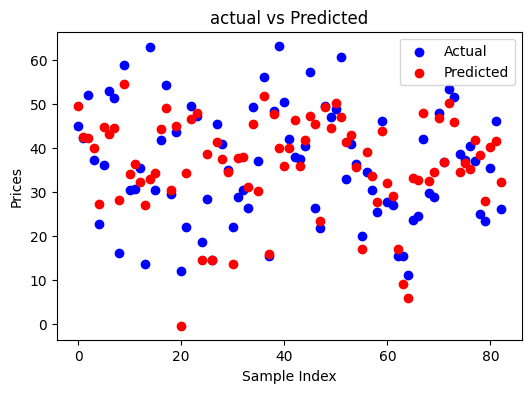

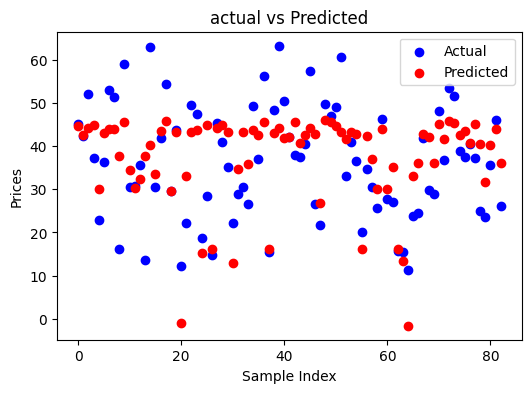

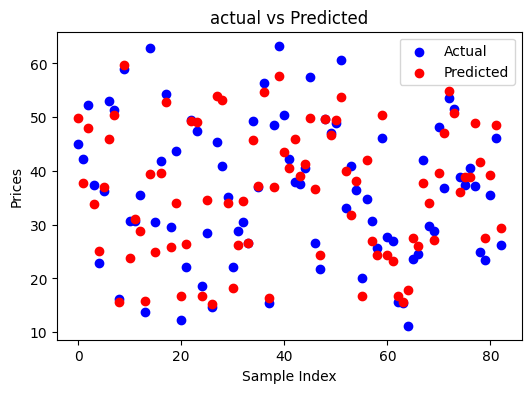

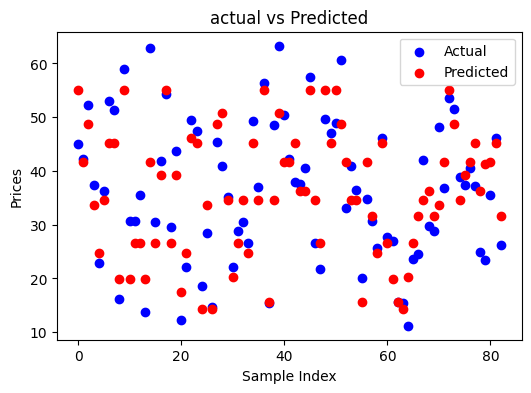

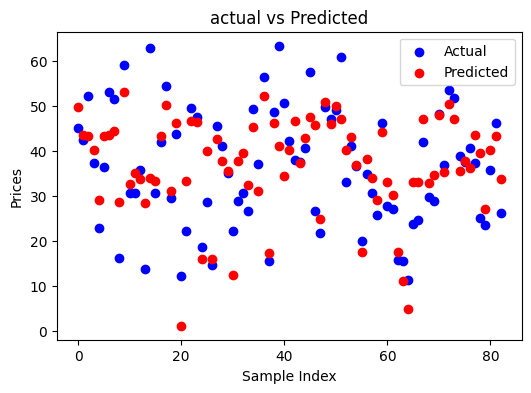

In [59]:
for pred in y_pred:
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')     
    plt.scatter(range(len(y_test)), pred, color='red', label='Predicted')     
    plt.xlabel("Sample Index")
    plt.ylabel("Prices")
    plt.title("actual vs Predicted")
    plt.legend()
    plt.show()